<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/HocPytorch_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.conv2 = nn.Conv2d(16, 64, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(64 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [0]:
input = torch.randn(1, 1, 32, 32)
print(input,"\n",input.shape)
out = net(input)
print(out)

tensor([[[[ 0.4544, -2.0360, -1.5386,  ...,  1.1923, -1.1327,  0.9374],
          [-0.3144,  1.1026, -0.7764,  ...,  0.0459,  0.5495, -0.8841],
          [-0.2516,  0.2515,  1.6496,  ..., -2.3972,  0.5674,  0.4191],
          ...,
          [ 0.9154,  0.7332, -0.4131,  ...,  1.6089, -0.6840,  0.5532],
          [-0.0228, -0.8514, -0.2071,  ...,  1.0957,  0.2592, -1.3767],
          [-1.3392,  1.2281, -0.8379,  ..., -0.5214,  0.1245, -1.7043]]]]) 
 torch.Size([1, 1, 32, 32])
tensor([[-0.0983,  0.0565,  0.0349, -0.0510, -0.0171, -0.0057, -0.1004,  0.0375,
         -0.0377,  0.0543]], grad_fn=<AddmmBackward>)


In [0]:
net.zero_grad()
out.backward(torch.randn(1,10))


In [0]:
output = net(input)
target = torch.randn(10)
target = target.view(1,-1)

criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.7205, grad_fn=<MseLossBackward>)


In [0]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [0]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0030,  0.0105, -0.0017,  0.0042,  0.0062, -0.0015,  0.0025, -0.0044,
        -0.0039, -0.0051, -0.0036, -0.0140, -0.0099,  0.0036,  0.0045, -0.0094])


In [0]:
optimizer = optim.Adam(net.parameters(), lr = 0.001)
optimizer.zero_grad()
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
loss.backward()
optimizer.step()

In [0]:
x = torch.rand_like(x , dtype = torch.float)
x

tensor([0.9548, 0.9448, 0.6419, 0.1192, 0.9732, 0.9429, 0.7299, 0.5083, 0.0518,
        0.3888])

In [0]:
from torch.nn.parameter import Parameter
import torch.nn.functional as F
import torch.nn.init as init
from torch.autograd import Variable 
import math
class LinearRG(nn.Module):
  __constants__ = ['bias']
  def __init__(self, in_features, out_features, bias=True):
    super(LinearRG, self).__init__()
    self.in_feature = in_features
    self.out_features = out_features
    self.weight = Parameter(torch.Tensor(out_features, in_features))
    if bias:
      bias = torch.Tensor(out_features)
    else:
      self.register_parameter("bias", None)
    self.reset_parameters()
  def reset_parameters(self):
    init.kaiming_uniform_(self.weight, a=math.sqrt(5))
    if self.bias is not None:
      fan_in, _ = init._calculate_fan_in_and_fan_out(self.weight)
      bound = 1 / math.sqrt(fan_in)
      init.uniform_(self.bias, -bound, bound)
  def forward(self , input):
    return F.linear(input, self.weight, self.bias)
  def extra_repr(self):
    return 'in_features={}, out_features={}, bias={}'.format(self.in_features, self.out_features, self.bias is not None)

In [0]:
import torch 
from torch.autograd import Variable 
x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]])) 
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))
class LinearRegressionModel(torch.nn.Module): 
  def __init__(self): 
    super(LinearRegressionModel, self).__init__() 
    self.linear = torch.nn.Linear(1, 1)  # One in and one out 
    
    def forward(self, x): 
      y_pred = self.linear(x) 
      return y_pred 
our_model = LinearRegressionModel()
criterion = nn.MSELoss(size_average=False)
optimizer = optim.Adam(our_model.parameters() ,lr= 0.001)

for epoch in range(500):
  pred_y = our_model(x_data)
  loss = criterion(pred_y, y_data)
  optimizer.zero_grad()
  loss.backward(create_graph=True,retain_graph=True)
  optimizer.step(closure=True)
  print('epoch {}, loss {}'.format(epoch, loss.data[0])) 

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


NameError: ignored

In [0]:
import torch 
from torch.autograd import Variable 

x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]])) 
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]])) 


class LinearRegressionModel(torch.nn.Module): 

	def __init__(self): 
		super(LinearRegressionModel, self).__init__() 
		self.linear = torch.nn.Linear(1, 1) # One in and one out 

	def forward(self, x): 
		y_pred = self.linear(x) 
		return y_pred 

# our model 
our_model = LinearRegressionModel() 

criterion = torch.nn.MSELoss(size_average = False) 
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01) 

for epoch in range(500): 
	# Forward pass: Compute predicted y by passing 
	# x to the model 
  epoch +=1 
	pred_y = our_model(x_data) 

	# Compute and print loss 
	loss = criterion(pred_y, y_data) 

	# Zero gradients, perform a backward pass, 
	# and update the weights. 
	optimizer.zero_grad() 
	loss.backward() 
	optimizer.step() 

new_var = Variable(torch.Tensor([[4.0]])) 
pred_y = our_model(new_var) 
print("predict (after training)", 4, our_model(new_var).data[0][0]) 


TabError: ignored

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
pts = 20

x_vals = np.random.rand(20)
x_train = np.asarray(x_vals,dtype=np.float32).reshape(-1,1)
m = 1
alpha = np.random.rand(1)
beta = np.random.rand(1)
y_correct = np.asarray([2*i+m for i in x_vals], dtype=np.float32).reshape(-1,1)

In [0]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(LinearRegressionModel, self).__init__() 
        # Calling Super Class's constructor
        self.linear = nn.Linear(input_dim, output_dim)
        # nn.linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function

        out = self.linear(x)
        return out

input_dim = 1
output_dim = 1

In [0]:
model = LinearRegressionModel(input_dim,output_dim)

criterion = nn.MSELoss()# Mean Squared Loss
l_rate = 0.01
optimiser = torch.optim.Adam(model.parameters(), lr = l_rate) #Stochastic Gradient Descent

epochs = 1000

In [0]:
for epoch in range(epochs):

    epoch +=1
    #increase the number of epochs by 1 every time
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_correct))

    #clear grads as discussed in prev post
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.item()))

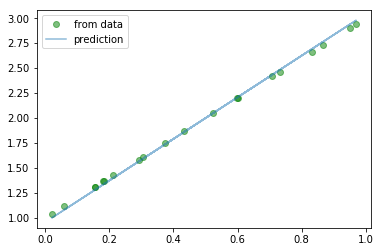

OrderedDict([('linear.weight', tensor([[2.0877]])), ('linear.bias', tensor([0.9542]))])


In [0]:
predicted =model.forward(Variable(torch.from_numpy(x_train))).data.numpy()

plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = .5)
plt.plot(x_train, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(model.state_dict())

# CNN training classifer CIFAR10

In [0]:
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10

transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [35]:
df_train = CIFAR10(root='/content', train = True, download= True, transform=transforms)
trainloader = DataLoader(df_train, batch_size = 4,
                        shuffle = True, num_workers = 2)
df_test = CIFAR10(root='/content', train = False, download= True, transform=transforms)
testloader = torch.utils.data.DataLoader(df_test, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


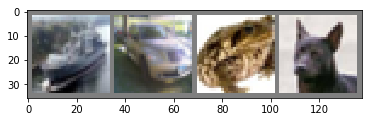

	 ship 	  car 	 frog 	  dog


In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images , labels = dataiter.next()
# show images lần lượt của dataset trước khi train
imshow(torchvision.utils.make_grid(images))

print(' '.join('\t%5s' % classes[labels[j]] for j in range(4)))


In [30]:

vowels = ['a', 'e', 'i', 'o', 'u']
vowelsIter = iter(vowels)# prints 'a'
print(next(vowelsIter))




a


In [31]:
# list of vowels
vowels = ['a', 'e', 'i', 'o', 'u']
vowelsIter = iter(vowels)# prints 'a'

print(next(vowelsIter))

# prints 'e'
print(next(vowelsIter))



a
e
